# Stock Market Data Analysis

## Introduction
In this notebook, we analyze stock market data over different time intervals to uncover trends, patterns, and insights that could aid in making informed decisions about market behavior. The goal is to explore how stock prices behave over time and to investigate any relationships between various features such as opening/closing prices, trading volume, etc.

### Objectives:
- Perform exploratory data analysis (EDA) on stock market data.
- Investigate patterns and trends in stock prices.
- Analyze the correlation between stock price features and trading volume.
- Build a predictive model for stock price movement prediction (if applicable).

## Data Overview
### Stock Market Data
- **Time Intervals:** 1-minute, 5-minute, 60-minute, 4-hour, and daily stock price data.
- **Features:** Open, Close, High, Low, Volume.
- **Source:** Description of the data source (e.g., Yahoo Finance).
- **Date Range:** Date range of the data used (e.g., 2007 to present).

In [1]:
import pandas as pd
import numpy as np
import os
from glob import  glob
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
paths = [
    "data/^NSEI_1d.csv",
    "data/^NSEI_1m.csv",
    "data/^NSEI_1mo.csv",
    "data/^NSEI_1wk.csv",
    "data/^NSEI_2m.csv",
    "data/^NSEI_3mo.csv",
    "data/^NSEI_4h.csv",
    "data/^NSEI_5d.csv",
    "data/^NSEI_5m.csv",
    "data/^NSEI_60m.csv"
]

In [3]:
def preprocess_stock_csvs(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)  # Create cleaned folder if not exists

    paths = glob(os.path.join(input_folder, "*.csv"))

    for path in paths:
        try:
            # Skip first 2 rows (metadata + Ticker row)
            df = pd.read_csv(path, skiprows=2)

            # Assign proper column names
            df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

            # Convert Date column to datetime
            df['Date'] = pd.to_datetime(df['Date'])

            # Convert numeric columns to float
            numeric_cols = ['Close', 'High', 'Low', 'Open', 'Volume']
            df[numeric_cols] = df[numeric_cols].astype(float)

            # Sort by Date
            df = df.sort_values('Date')

            # Save to cleaned folder
            output_path = os.path.join(output_folder, os.path.basename(path))
            df.to_csv(output_path, index=False)

            print(f"Cleaned: {os.path.basename(path)}")

        except Exception as e:
            print(f"Failed: {os.path.basename(path)} – {str(e)}")

In [4]:
preprocess_stock_csvs(input_folder='data', output_folder='cleaned_data')


Cleaned: ^NSEI_1d.csv
Cleaned: ^NSEI_1m.csv
Cleaned: ^NSEI_1mo.csv
Cleaned: ^NSEI_1wk.csv
Cleaned: ^NSEI_2m.csv
Cleaned: ^NSEI_3mo.csv
Cleaned: ^NSEI_4h.csv
Cleaned: ^NSEI_5d.csv
Cleaned: ^NSEI_5m.csv
Cleaned: ^NSEI_60m.csv


In [5]:
day_data = pd.read_csv('cleaned_data/^NSEI_1d.csv')

In [6]:
day_data

,Date,Close,High,Low,Open,Volume
0,2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0.0
1,2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0.0
2,2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0.0
3,2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0.0
4,2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0.0
...,...,...,...,...,...,...
4315,2025-04-28,24328.500000,24355.099609,24054.050781,24070.250000,320500.0
4316,2025-04-29,24335.949219,24457.650391,24290.750000,24370.699219,357600.0
4317,2025-04-30,24334.199219,24396.150391,24198.750000,24342.050781,424500.0
4318,2025-05-02,24346.699219,24589.150391,24238.500000,24311.900391,421100.0


In [7]:
day_data.describe()

,Close,High,Low,Open,Volume
count,4320.000000,4320.000000,4320.000000,4320.000000,4.320000e+03
mean,10360.667583,10422.923797,10295.430076,10366.967559,2.073854e+05
std,5781.957972,5801.702575,5760.288771,5784.700341,2.074152e+05
min,2524.199951,2585.300049,2252.750000,2553.600098,0.000000e+00
25%,5624.012695,5663.824951,5577.700195,5628.437622,0.000000e+00
50%,8541.300293,8595.375000,8504.050293,8544.475098,1.830000e+05
75%,13536.362305,13591.612793,13435.912598,13521.024902,2.892000e+05
max,26216.050781,26277.349609,26151.400391,26248.250000,1.811000e+06


In [8]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4320 entries, 0 to 4319
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4320 non-null   object 
 1   Close   4320 non-null   float64
 2   High    4320 non-null   float64
 3   Low     4320 non-null   float64
 4   Open    4320 non-null   float64
 5   Volume  4320 non-null   float64
dtypes: float64(5), object(1)
memory usage: 202.6+ KB


In [9]:
day_data['Date'] = pd.to_datetime(day_data['Date'])

In [10]:
day_data['Year'] = day_data['Date'].dt.year
day_data['Month'] = day_data['Date'].dt.month
day_data['Day'] = day_data['Date'].dt.day

In [11]:
day_data.head()

,Date,Close,High,Low,Open,Volume,Year,Month,Day
0,2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0.0,2007,9,17
1,2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0.0,2007,9,18
2,2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0.0,2007,9,19
3,2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0.0,2007,9,20
4,2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0.0,2007,9,21


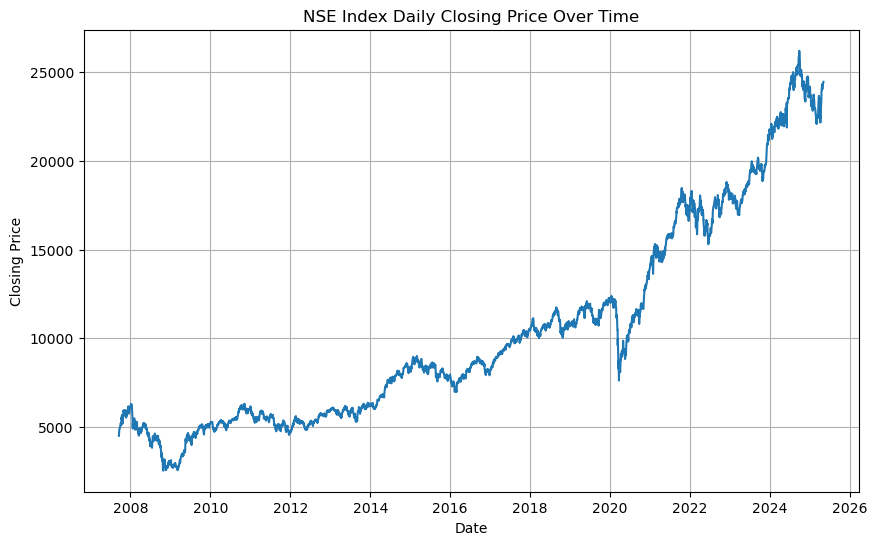

In [12]:
plt.figure(figsize = (10, 6))
plt.plot(day_data['Date'], day_data['Close'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("NSE Index Daily Closing Price Over Time")
plt.grid(True)
plt.show()

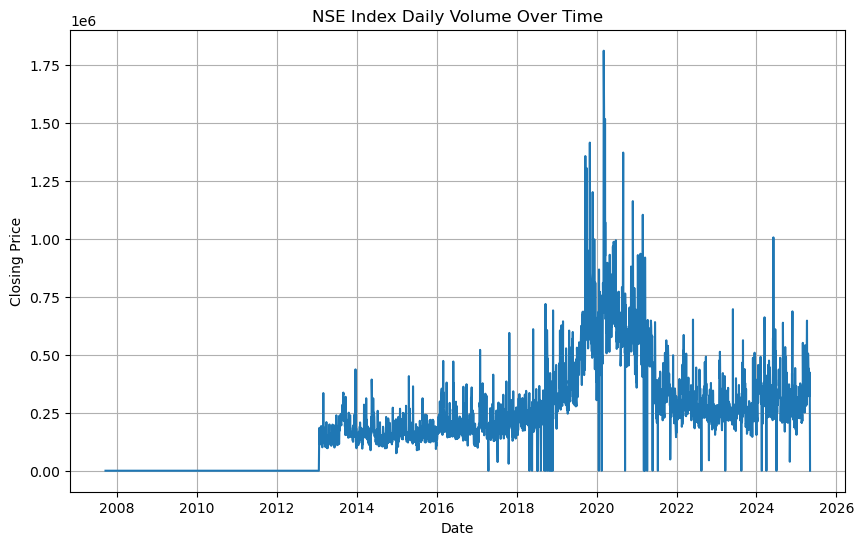

In [13]:
plt.figure(figsize = (10, 6))
plt.plot(day_data['Date'], day_data['Volume'])
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("NSE Index Daily Volume Over Time")
plt.grid(True)
plt.show()

### Feature Engineering: 

# Splitting Data:

In [14]:
day_data[day_data['Volume'] == 0]

,Date,Close,High,Low,Open,Volume,Year,Month,Day
0,2007-09-17,4494.649902,4549.049805,4482.850098,4518.450195,0.0,2007,9,17
1,2007-09-18,4546.200195,4551.799805,4481.549805,4494.100098,0.0,2007,9,18
2,2007-09-19,4732.350098,4739.000000,4550.250000,4550.250000,0.0,2007,9,19
3,2007-09-20,4747.549805,4760.850098,4721.149902,4734.850098,0.0,2007,9,20
4,2007-09-21,4837.549805,4855.700195,4733.700195,4752.950195,0.0,2007,9,21
...,...,...,...,...,...,...,...,...,...
4052,2024-04-01,22462.000000,22529.949219,22427.750000,22455.000000,0.0,2024,4,1
4112,2024-07-01,24141.949219,24164.000000,23992.699219,23992.949219,0.0,2024,7,1
4113,2024-07-02,24123.849609,24236.349609,24056.400391,24228.750000,0.0,2024,7,2
4114,2024-07-03,24286.500000,24309.150391,24207.099609,24291.750000,0.0,2024,7,3


In [15]:
def preprocess_data(file):
    df = pd.read_csv(file)
    df['Date'] = pd.to_datetime(day_data['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month
    df['Day'] = df['Date'].dt.day